# Reddit r/jokes Analysis

Setup: Please run `downloader.py` to get your data. You may get some KeyError's - these are due to pushshift cutting requests short in order to reduce traffic. Restart the process from the latest year which wasn't yet saved to your machine.

Once you get your json files you can start the analysis!

## Imports

In [158]:
import json
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import math

## Data loading and preprocessing

In [127]:
stop_words = set(stopwords.words('english'))

jokes = {}
for year in range(2010, 2020):
    jokes[year] = []
    with open(f'reddit_jokes_{year}.json') as json_file:
        year_jokes = json.load(json_file)
            
        year_jokes = [joke for joke in year_jokes if 'selftext' in joke.keys()]
        year_jokes = [joke for joke in year_jokes if joke['title'] not in ['[removed]', '[deleted]', 'removed', 'deleted', '']]
        year_jokes = [joke for joke in year_jokes if joke['selftext'] not in ['[removed]', '[deleted]', 'removed', 'deleted', '']]
        
        for joke in year_jokes:
            joke['year'] = year
            words = joke['title'] + ' ' + joke['selftext']
            # delete these since we absorbed them
            joke.pop('title', None)
            joke.pop('selftext', None)
            
            # we don't need these for now either
            joke.pop('created_utc', None)
            # joke.pop('url', None)
            # we'll keep the url to double-check the output
            
            # remove punctuation
            words = words.split()
            words = [''.join(ch for ch in word if ch.isalnum()) for word in words]

            # all words to lowercase
            words = [word.lower() for word in words]
            
            words = [word for word in words if word != '']
            # filter out english stopwords
            filtered_words = []
            for w in words: 
                if w not in stop_words: 
                    filtered_words.append(w)
                    
            joke['words'] = filtered_words
            
            
        jokes[year].extend(year_jokes)

In [138]:
total_joke_count = 0
for year in range(2010, 2020):
    crt = len(jokes[year])
    print(f'Number of jokes from {year}: {crt}')
    total_joke_count += crt
    
print(f'Total: {total_joke_count}')

Number of jokes from 2010: 247
Number of jokes from 2011: 3860
Number of jokes from 2012: 12114
Number of jokes from 2013: 15969
Number of jokes from 2014: 31323
Number of jokes from 2015: 63644
Number of jokes from 2016: 52384
Number of jokes from 2017: 43411
Number of jokes from 2018: 66188
Number of jokes from 2019: 72127
Total: 361267


In [129]:
print(jokes[2011][0])

{'num_comments': 23, 'over_18': False, 'score': 14, 'url': 'http://www.reddit.com/r/Jokes/comments/euhyt/the_old_soldiers_home/', 'year': 2011, 'words': ['old', 'soldiers', 'home', 'historian', 'visiting', 'retirement', 'home', 'old', 'soldiers', 'turned', 'heard', 'others', 'stories', 'jokes', 'often', 'assigned', 'number', 'six', 'one', 'would', 'shout', 'corner', 'old', 'men', 'rocking', 'chairs', 'would', 'give', 'chuckle', 'fourteen', 'another', 'yelled', 'side', 'room', 'bigger', 'laugh', 'erupted', 'assembled', 'group', 'wanting', 'part', 'fun', 'historian', 'joined', 'three', 'got', 'nothing', 'whats', 'wrong', 'didnt', 'anyone', 'laugh', 'historian', 'asked', 'nearest', 'retiree', 'old', 'man', 'replied', 'ehh', 'didnt', 'tell', 'right']}


## Breakdown by year

Since our analysis is limited in that we only extracted at most 7000 jokes for each month in the analysis' period, we should take all of this data with a grain of salt as there might have been many, many more posts that have gone unnoticed.

## r/Jokes subscribers

![](subscribers.png "Subsriber count evolution (thanks to subredditstats.com)")

Current number of subscribers (as of Apr. 2020): **18.3M**

**This aspect above is really important! The number of subscribers influences all of the numbers below!**

## Total score by year

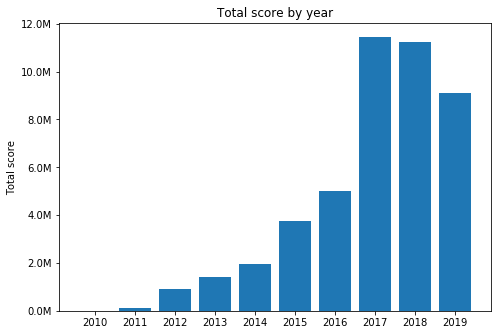

In [122]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = range(2010, 2020)

total_score = {}
for year in years:
    total_score[year] = 0
    for joke in jokes[year]:
        total_score[year] += joke['score']
    
total_scores = [total_score[year]/1000000 for year in years]
ax.bar(years, total_scores)

plt.title('Total score by year')
plt.xticks(years)
plt.ylabel('Total score')
plt.yticks(range(0, 13, 2), [f'{score}.0M' for score in range(0, 13, 2)])
plt.show()

## Maximum score by year

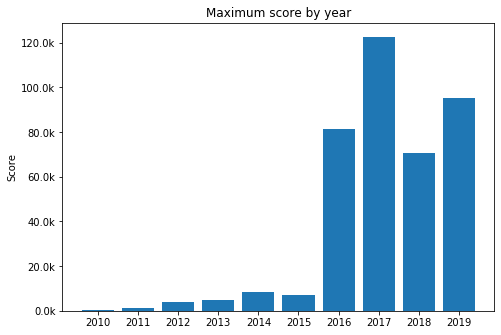

In [126]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = range(2010, 2020)

max_score = {}
for year in years:
    max_score[year] = 0
    for joke in jokes[year]:
        if max_score[year] < joke['score']:
            max_score[year] = joke['score']
        
max_scores = [max_score[year]/1000 for year in years]
ax.bar(years, max_scores)

plt.title('Maximum score by year')
plt.xticks(years)
plt.yticks(range(0, 121, 20), [f'{score}.0k' for score in range(0, 121, 20)])
plt.ylabel('Score')
plt.show()

## Breakdown by score

In [130]:
all_jokes = []
years = range(2010, 2020)
for year in years:
    all_jokes.extend(jokes[year])

In [135]:
score_limits = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
jokes_by_score = {}
for limit in score_limits:
    jokes_by_score[limit] = 0

for joke in all_jokes:
    for limit in score_limits:
        if joke['score'] <= limit:
            jokes_by_score[limit] += 1
            break

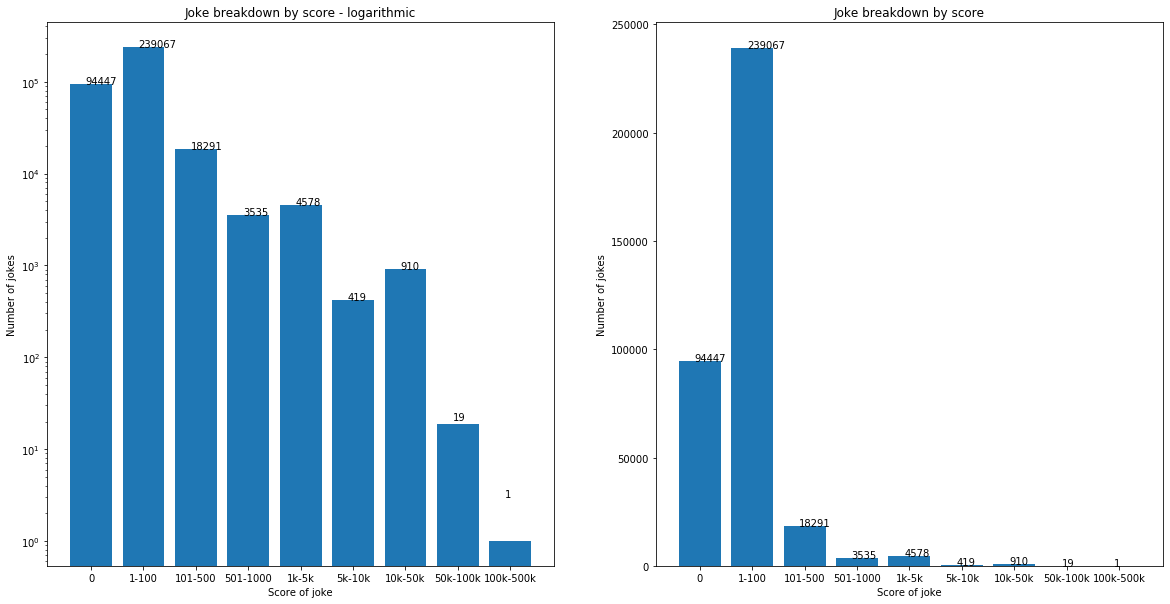

In [199]:
sizes = [jokes_by_score[limit] for limit in score_limits]
xlabels = ['0', '1-100', '101-500', '501-1000', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k'] 

fig, (loga, deci) = plt.subplots(1, 2, figsize=(20, 10))

loga.bar(range(len(score_limits)), sizes)
loga.set_yscale('log')
loga.set_ylabel('Number of jokes')
loga.set_xticks(range(len(score_limits)))
loga.set_xticklabels(xlabels)
loga.set_xlabel('Score of joke')
loga.set_title('Joke breakdown by score - logarithmic')
for i, v in enumerate([jokes_by_score[limit] for limit in score_limits]):
    loga.text(i - 0.1, v + 2, str(v), color='black')

deci.bar(range(len(score_limits)), sizes)
deci.set_ylabel('Number of jokes')
deci.set_xticks(range(len(score_limits)))
deci.set_xticklabels(xlabels)
deci.set_xlabel('Score of joke')
deci.set_title('Joke breakdown by score')
for i, v in enumerate([jokes_by_score[limit] for limit in score_limits]):
    deci.text(i - 0.1, v + 2, str(v), color='black')

plt.show()

**Unfortunately our dataset is not evenly distributed at all.**

Going further, first, we'll analyze the top (+5k scored) jokes. After this we'll take a closer look at the 0-5k range, and then create a classifier to give us a score based on our joke.

## Top jokes

In [204]:
top_rated = []
years = range(2010, 2020)
for year in years:
    for joke in jokes[year]:
        if joke['score'] > 5000:
            top_rated.append(joke)
            
print(f'{len(top_rated)} top rated jokes (with +5.0k score)')

1349 top rated jokes (with +5.0k score)


### Future features:

- Top jokes analysis
- is NSFW joke better on average
- average joke length/score
